In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/used-car-price-prediction-dataset/used_cars.csv')

In [3]:
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
model_year,4009.0,2015.51559,6.104816,1974.0,2012.0,2017.0,2020.0,2024.0


In [11]:
# Check for NULL Values in the Dataset

df.isna().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [12]:
# Check for Duplicates in the Dataset

df.duplicated().sum()

0

# **Cleaning of the Dataset**

In [13]:
# Encoding 'brand' categorical data column

from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

In [14]:
df['brand'] = labelEncoder.fit_transform(df['brand'])

In [26]:
# Create new Fature named 'milage_int'
# Contains Milage converted to int dtype 

def return_milage_int(s):
    d = int((s.replace(',','')).replace(' mi.',''))
    return d
    

df['milage_int'] = df['milage'].map(return_milage_int)
df.drop('milage', axis=1, inplace=True)

In [28]:
# Create new Fature named 'price_int'
# Contains Price converted to int dtype 

def return_price_int(s):
    d = int((s.replace(',','')).replace('$',''))
    return d
    

df['price_int'] = df['price'].map(return_price_int)
df.drop('price', axis=1, inplace=True)

In [35]:
# Fill NULL Values in 'clean_title' feature
df['clean_title'] = df['clean_title'].fillna('No')


# Encoding the 'clean_title' feature
df['clean_title'] = labelEncoder.fit_transform(df['clean_title'])

In [42]:
# Fill NULL Values in 'accident' feature
# df['accident'] = df['accident'].fillna('No')


# Replace the Values in 'accident' feature
df['accident'] = df['accident'].replace({'At least 1 accident or damage reported':'Yes',
                                         'None reported': 'No'})


# Encoding the 'accident' feature
df['accident'] = labelEncoder.fit_transform(df['accident'])

In [74]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3479
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

<Axes: xlabel='fuel_type', ylabel='count'>

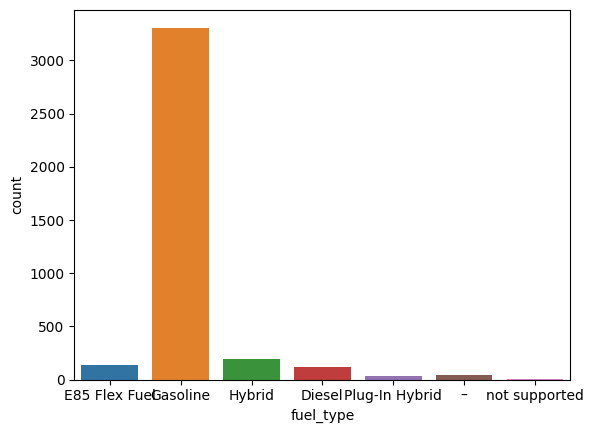

In [68]:
sns.countplot(x='fuel_type', data=df)

In [77]:
# Fill the Mode Value i.e. 'Gasoline'
df['fuel_type'] = df['fuel_type'].fillna('Gasoline')

df['fuel_type'] = df['fuel_type'].replace({'–':'Hybrid', 'not supported':'Hybrid'})

# Perform Encoding on the 'fuel_type' Feature
df['fuel_type'] = labelEncoder.fit_transform(df['fuel_type'])

In [81]:
# Encoding 'ext_col' and 'int_col' Features

df['ext_col'] = labelEncoder.fit_transform(df['ext_col'])
df['int_col'] = labelEncoder.fit_transform(df['int_col'])

In [87]:
# Encoding the 'transmission' Feature

df['transmission'] = labelEncoder.fit_transform(df['transmission'])

In [91]:
# Encoding the 'engine' Feature

df['engine'] = labelEncoder.fit_transform(df['engine'])

In [95]:
# Encoding the 'model' Feature

df['model'] = labelEncoder.fit_transform(df['model'])

In [94]:
len(df['model'].unique())

1898

In [93]:
df['model'].unique()

array(['Utility Police Interceptor Base', 'Palisade SEL', 'RX 350 RX 350',
       ..., 'Martin DB7 Vantage Volante', 'Impala 2LZ', 'Taycan'],
      dtype=object)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   brand         4009 non-null   int64
 1   model         4009 non-null   int64
 2   model_year    4009 non-null   int64
 3   fuel_type     4009 non-null   int64
 4   engine        4009 non-null   int64
 5   transmission  4009 non-null   int64
 6   ext_col       4009 non-null   int64
 7   int_col       4009 non-null   int64
 8   accident      4009 non-null   int64
 9   clean_title   4009 non-null   int64
 10  milage_int    4009 non-null   int64
 11  price_int     4009 non-null   int64
dtypes: int64(12)
memory usage: 376.0 KB


# **Extract Feature and Target Variables**

In [100]:
X = df.drop('price_int', axis=1)
Y = df['price_int']

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# **Create and Train the SVR Model**

In [117]:
from sklearn.svm import SVR

In [120]:
# Create an SVR model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [121]:
y_pred = svr_rbf.predict(x_test)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             4009 non-null   int64  
 1   model             4009 non-null   int64  
 2   model_year        4009 non-null   int64  
 3   fuel_type         4009 non-null   int64  
 4   engine            4009 non-null   int64  
 5   transmission      4009 non-null   int64  
 6   ext_col           4009 non-null   int64  
 7   int_col           4009 non-null   int64  
 8   accident          4009 non-null   int64  
 9   clean_title       4009 non-null   int64  
 10  milage_int        4009 non-null   int64  
 11  price_int         4009 non-null   int64  
 12  model_year_trans  4009 non-null   float64
dtypes: float64(1), int64(12)
memory usage: 407.3 KB


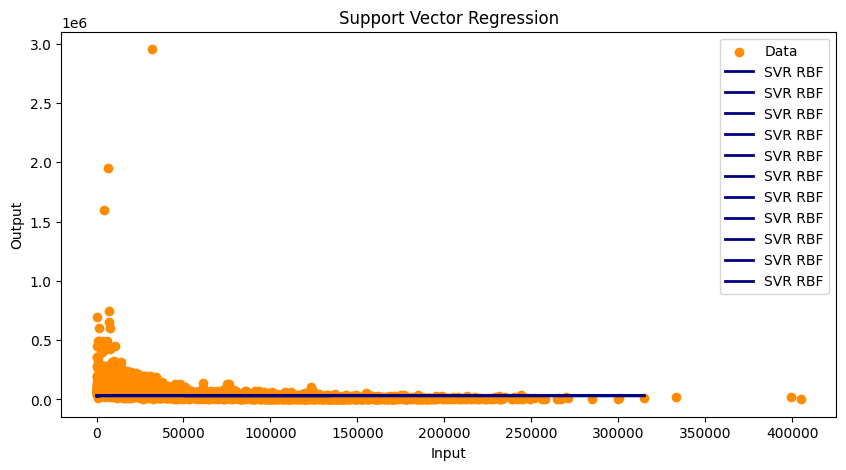

In [125]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(X['milage_int'], Y, color='darkorange', label='Data')
plt.plot(x_test, y_pred, color='navy', lw=2, label='SVR RBF')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Support Vector Regression')
plt.legend()
plt.show()
